# Plot model output

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import dfm_tools as dfmt
import os
import glob
from matplotlib.gridspec import GridSpec
#import cartopy.crs as ccrs
import contextily as ctx
import geopandas as gpd
from shapely.geometry import LineString

c:\Code\COMPASS\.pixi\envs\compass-dfm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#set paths and parameters per model
#the necessary data is automatically downloaded from opendap if needed
dir_runs = r'p:\11210471-001-compass\02_Models\Delft3DFM\mozambique_model\computations'
model = 'mozambique_spw_Idai_area_MZB_500m_gebco2024' 

for fname in os.listdir(os.path.join(dir_runs,model,'output')):
    if fname.endswith('_his.nc'):
        file_nc_his = os.path.join(dir_runs,model,'output',fname)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'p:\\11210471-001-compass\\02_Models\\Delft3DFM\\mozambique_model\\computations\\mozambique_spw_Idai_area_MZB_500m_gebco2024\\output'

In [4]:
#open hisfile with xarray and print netcdf structure
if file_nc_his is not None:
    ds_his = xr.open_mfdataset(file_nc_his, preprocess=dfmt.preprocess_hisnc)

In [5]:
ds_his.stations

<xarray.DataArray 'stations' (stations: 139)> Size: 11kB
array(['INHAMBANE IHO', 'BAZARUTO IHO', 'BARTOLOMEU DIAS IHO', 'CHILOANE IHO',
       'BEIRA IHO', 'CHINDE IHO', 'QUELIMANE IHO', 'PEBANE IHO', 'BeiraOff',
       'Airport', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814',
       '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823',
       '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832',
       '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841',
       '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850',
       '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859',
       '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868',
       '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877',
       '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886',
       '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895',
       '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
       '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922',
       '1923', '1924', '1925', '1926', '1927'], dtype='<U19')
Coordinates:
    station_x_coordinate  (stations) float64 1kB 35.38 35.43 ... 34.81 34.82
    station_y_coordinate  (stations) float64 1kB -23.87 -21.65 ... -20.49 -20.5
  * stations              (stations) <U19 11kB 'INHAMBANE IHO' ... '1927'

In [ ]:
ds_his_sel = ds_his.sel(stations=['BEIRA IHO','BAZARUTO IHO','CHINDE IHO','PEBANE IHO'])
ds_his_sel

<xarray.Dataset> Size: 2MB
Dimensions:                                  (stations: 4,
                                              station_geom_nNodes: 139,
                                              time: 2917)
Coordinates:
    station_x_coordinate                     (stations) float64 32B 34.83 ......
    station_y_coordinate                     (stations) float64 32B -19.82 .....
  * time                                     (time) datetime64[ns] 23kB 2019-...
  * stations                                 (stations) <U19 304B 'BEIRA IHO'...
Dimensions without coordinates: station_geom_nNodes
Data variables: (12/53)
    wgs84                                    int32 4B ...
    station_id                               (stations) |S256 1kB dask.array<chunksize=(4,), meta=np.ndarray>
    station_geom                             int32 4B ...
    station_geom_node_count                  (stations) int32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    station_geom_node_coordx                 (station_geom_nNodes) float64 1kB dask.array<chunksize=(139,), meta=np.ndarray>
    station_geom_node_coordy                 (station_geom_nNodes) float64 1kB dask.array<chunksize=(139,), meta=np.ndarray>
    ...                                       ...
    water_balance_Qext_out_2D                (time) float64 23kB dask.array<chunksize=(2917,), meta=np.ndarray>
    water_balance_Qext_total_2D              (time) float64 23kB dask.array<chunksize=(2917,), meta=np.ndarray>
    water_balance_total_volume_interception  (time) float64 23kB dask.array<chunksize=(2917,), meta=np.ndarray>
    water_balance_evaporation_interception   (time) float64 23kB dask.array<chunksize=(2917,), meta=np.ndarray>
    water_balance_precipitation_on_ground    (time) float64 23kB dask.array<chunksize=(2917,), meta=np.ndarray>
    timestep                                 (time) float64 23kB dask.array<chunksize=(2917,), meta=np.ndarray>
Attributes:
    institution:               Deltares
    references:                http://www.deltares.nl
    source:                    Deltares, D-Flow FM Version 1.2.177.142431, Ja...
    history:                   Created on 2024-10-29T10:27:09+0100, D-Flow FM
    date_created:              2024-10-29T10:27:09+0100
    date_modified:             2024-10-29T10:27:09+0100
    Conventions:               CF-1.5 Deltares-0.1 ACDD-1.3
    uuid:                      905ef111-00dc-4e92-95ab-bed2f94a2203
    time_coverage_start:       2019-03-05T**:00:00+00:00
    time_coverage_end:         2019-03-25T**:00:00+00:00
    time_coverage_duration:    P0000-00-20T06:00:00
    time_coverage_resolution:  P0000-00-00T00:10:00

>> reading coastlines: 3.22 sec
>> reading country borders: 0.07 sec


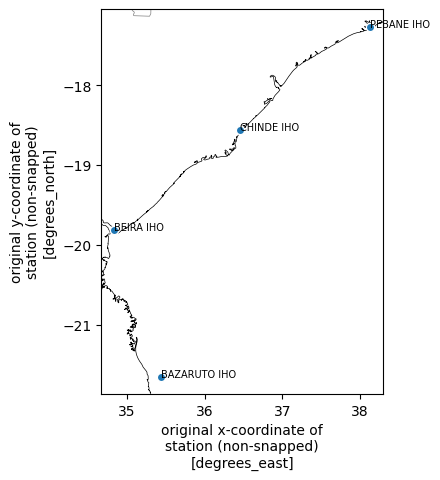

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ds_his_sel.plot.scatter(ax=ax, x='station_x_coordinate', y='station_y_coordinate', marker="o")
for tt,txt in enumerate(ds_his_sel.stations.values):
    plt.text(ds_his_sel.station_x_coordinate.values[tt],ds_his_sel.station_y_coordinate.values[tt],txt,size=7)
dfmt.plot_coastlines(ax=ax, min_area=1000, linewidth=0.5, zorder=0)
dfmt.plot_borders(ax=ax, zorder=0)


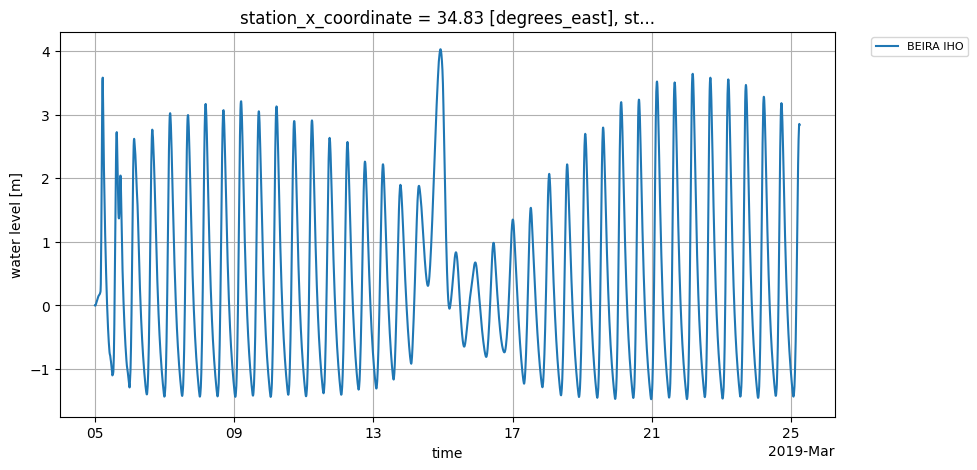

In [7]:
if file_nc_his is not None:
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    ds_his_sel.sel(stations=['BEIRA IHO']).waterlevel.plot.line(ax=ax, x='time')
    ax.legend(ds_his_sel.stations.to_series(),bbox_to_anchor=(1.04, 1),loc="upper left",fontsize=8) 
    plt.grid()

### Plot map output

In [23]:
files_nc_map = glob.glob(os.path.join(dir_runs,model,'output','*map.nc'))
ds_dfm_map = dfmt.open_partitioned_dataset(files_nc_map)

>> xu.open_dataset() with 4 partition(s): 1 2 3 4 : 41.37 sec
>> xu.merge_partitions() with 4 partition(s): 1.58 sec
>> dfmt.open_partitioned_dataset() total: 42.97 sec


In [18]:
# Find time of max WL at the output location
id_ts_max = ds_his_sel['waterlevel'].sel(stations=['BEIRA IHO']).argmax().values.tolist()
time_ts_max = ds_his_sel['time'].isel(time=id_ts_max).values

In [45]:
shapefile_path = r"p:\11210471-001-compass\01_Data\IBTrACS\SELECTED_TRACKS\IBTrACS_IDAI.shp"
gdf = gpd.read_file(shapefile_path)

# Check the contents of the GeoDataFrame
print(gdf.head())
line = LineString(gdf.geometry)
line_gdf = gpd.GeoDataFrame(geometry=[line], crs=gdf.crs)

             SID  SEASON  NUMBER BASIN SUBBASIN  NAME             ISO_TIME  \
0  2019063S18038    2019      14    SI       MM  IDAI  2019-03-04 00:00:00   
1  2019063S18038    2019      14    SI       MM  IDAI  2019-03-04 03:00:00   
2  2019063S18038    2019      14    SI       MM  IDAI  2019-03-04 06:00:00   
3  2019063S18038    2019      14    SI       MM  IDAI  2019-03-04 09:00:00   
4  2019063S18038    2019      14    SI       MM  IDAI  2019-03-04 12:00:00   

  NATURE   LAT   LON  ...  USA_SEA_SW  USA_SEA_NW STORM_SPD STORM_DR  year  \
0     TS -18.0  38.0  ...         NaN         NaN         2       10  2019   
1     TS -17.9  38.0  ...         NaN         NaN         2      335  2019   
2     TS -17.8  37.9  ...         NaN         NaN         4      285  2019   
3     TS -17.8  37.6  ...         NaN         NaN         6      280  2019   
4     TS -17.7  37.3  ...         NaN         NaN         4      310  2019   

   month day hour min            geometry  
0      3   4    0 

Text(0.5, 0.98, 'Delft3D-FM model output for tropical cyclone Idai based on IBTrACS')

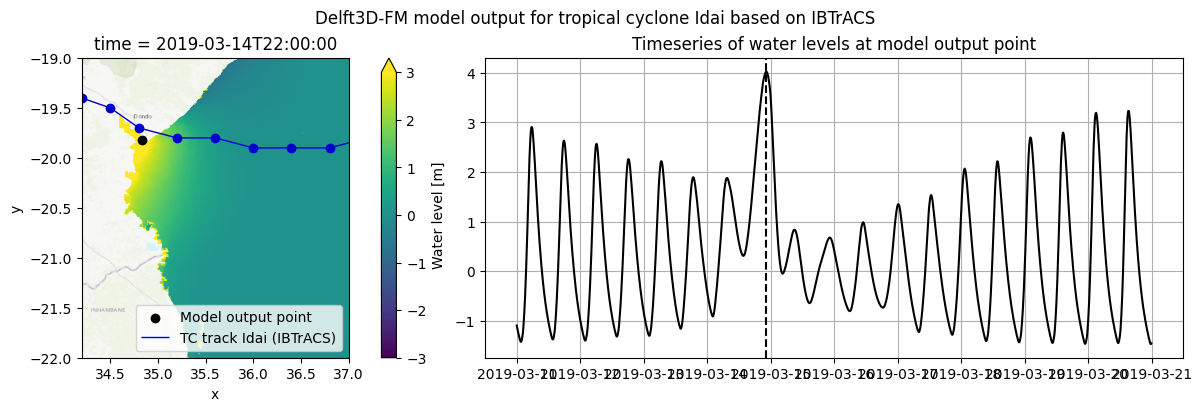

In [79]:
fig = plt.figure(layout="constrained",figsize=(12,4))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])#projection = ccrs.epsg(32736))

ax1.set_title('Total water level [mMSL]')
#sc = ax1.scatter(ds_dfm_map['mesh2d_face_x'].values, ds_dfm_map['mesh2d_face_y'].values, c=ds_dfm_map['mesh2d_s1'].sel(time=time_ts_max,method='nearest').values,vmin=-3,vmax=3,  cmap='viridis',s=5)
sc = ds_dfm_map['mesh2d_s1'].sel(time=time_ts_max,method='nearest').ugrid.plot(ax=ax1,vmin=-3,vmax=3,cmap='viridis')
plot_loc = ax1.scatter(ds_his_sel.sel(stations=['BEIRA IHO']).station_x_coordinate, ds_his_sel.sel(stations=['BEIRA IHO']).station_y_coordinate,c='k',label='Model output point')
ax1.set_aspect('equal')
ax1.set_ylim([-22,-19]); ax1.set_xlim([34.2,37])
ctx.add_basemap(ax=ax1, source=ctx.providers.Esri.WorldTopoMap, crs='EPSG:4326', attribution=False)
gdf.plot(ax=ax1,color='mediumblue', linewidth=1)
line_gdf.plot(ax=ax1, color='mediumblue', linewidth=1, label='TC track Idai (IBTrACS)')
ax1.legend(loc='lower right')

ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(ds_his_sel.sel(time=slice('2019-03-11','2019-03-20')).sel(stations='BEIRA IHO').time,ds_his_sel.sel(time=slice('2019-03-11','2019-03-20')).sel(stations='BEIRA IHO').waterlevel,color='k')
lims = ax2.get_ylim()
ax2.plot([time_ts_max,time_ts_max],lims,'k--')
ax2.set_ylim(lims)
ax2.grid()
ax2.set_title('Timeseries of water levels at model output point')

fig.suptitle('Delft3D-FM model output for tropical cyclone Idai based on IBTrACS')